<a href="https://colab.research.google.com/github/savika10/ML--classification/blob/master/Marketing_campaign_for_Banking_products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Description:**
The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

**GOAL**


---



 

> The classification goal is to predict the likelihood of a liability customer buying personal loans.







In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#import the dataset
dataset=pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',sheet_name="Data")
df=pd.DataFrame(dataset)
print(df.dtypes)

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object


**Attribute Information:**

● **ID:** Customer ID

● **Age:** Customer's age in completed years

● **Experience:** #years of professional experience

● **Income:** Annual income of the customer ($000)

● **ZIP Code:** Home Address ZIP code.

● **Family:** Family size of the customer

● **CCAvg:** Avg. spending on credit cards per month

● **Education:** Education Level. 1: Undergrad; 2: Graduate; 3:
Advanced/Professional

● **Mortgage:** Value of house mortgage if any. 

● **Personal Loan:** Did this customer accept the personal loan offered in the last
campaign?

● **Securities Account:** Does the customer have a securities account with the bank?

● **CD Account:** Does the customer have a certificate of deposit (CD) account with
the bank?

● **Online:** Does the customer use internet banking facilities?

● **Credit card:** Does the customer use a credit card issued by the bank?






In [4]:
df.head()



,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.sample(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4140,4141,63,38,32,94015,1,1.5,2,0,0,0,0,0,0
4651,4652,48,24,58,94005,2,1.7,1,0,0,0,0,0,0
1654,1655,60,34,102,94305,2,2.0,1,0,0,0,0,1,1
2699,2700,37,11,22,90035,3,0.1,2,114,0,0,0,0,0
1775,1776,46,22,73,91360,1,0.8,3,117,0,0,0,0,0


In [6]:
df.shape

(5000, 14)

In [7]:
df.index

RangeIndex(start=0, stop=5000, step=1)

In [8]:
df.groupby('Personal Loan').count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


According to problem statement, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

In [9]:
A= df.isnull().values.any()
print(A)


False


this means dataset have no NULL values

In [11]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 14)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024672,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050089,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024672,-0.052030,-0.050089,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


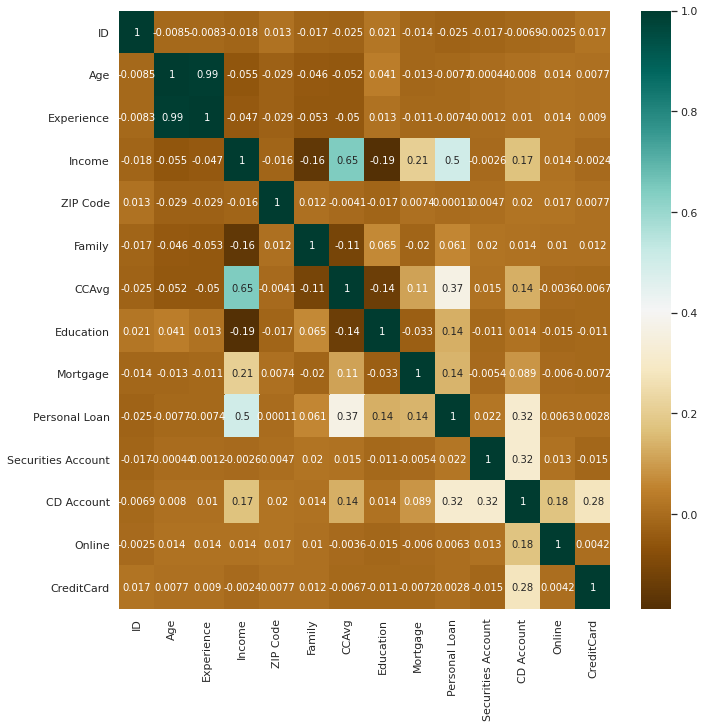

In [12]:
# Finding the relations between the variables.
plt.figure(figsize=(11,11))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77955731d0>,
      dtype=object)

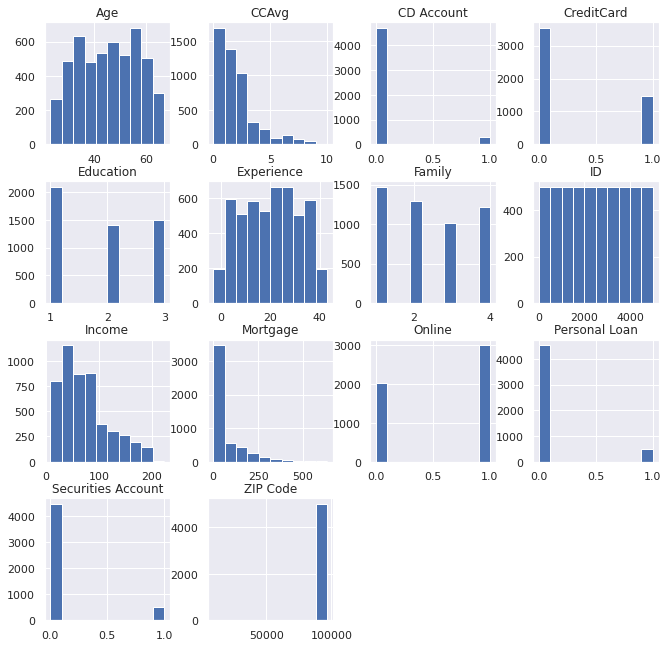

In [14]:
df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])
                        

**I have characterised the features into the four types:**


> 1. continuous : Age, Income, Mortgage,Id,CCAvg,Experience
2. Dichotomous : CD Account,Online,Personal Loan,Securities account,Credit card
3. Ordinal: Education, Family
4. Nominal: Zip Code





Let's Convert Dichotomous data and ordinal data into categorical data type

In [15]:
#changing following variables to category type
var=['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']
df[var]=df[var].astype('category')

In [16]:
df.dtypes

ID                       int64
Age                      int64
Experience               int64
Income                   int64
ZIP Code                 int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [17]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,1.937913,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.747666,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,10.000000,635.000000


#**EDA**

**NUMBER OF UNIQUE IN EACH COLUMN**

In [18]:
df.nunique(axis=0)

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

Since ID have 5000 unique values,we'll drop it.

In [27]:
df=df.drop(['ID'],axis=1)

**NUMBER OF PEOPLE WITH ZERO MORTGAGE**

In [28]:
(df.Mortgage==0).sum()

3462

**NUMBER OF PEOPLE WITH ZERO CREDIT CARD SPENDING PER MONTH**

In [29]:
(df.CCAvg==0).sum()

106

**VALUE COUNTS OF ALL CATEGORICAL COLUMN**

In [30]:
df.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [31]:
df.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [32]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [33]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [34]:
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [35]:
df.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

**UNIVARIATE** **ANALYSIS**

In [38]:
print("income skewness value",df['Income'].skew()) 		
print("age skewness value",df['Age'].skew())
print("ccavg skewness value",df['CCAvg'].skew())
print("mortgage skewness value",df['Mortgage'].skew())

income skewness value 0.8413386072610816
age skewness value -0.02934068151284029
ccavg skewness value 1.598456618052042
mortgage skewness value 2.1040023191079444


**BIVARIATE** **ANALYSIS**

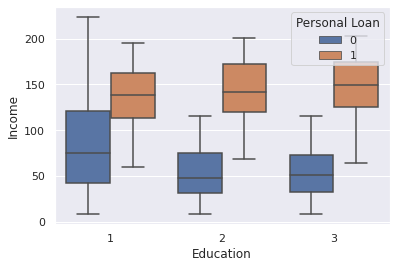

In [39]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=dataset)

Customer who have more income have granted Personal Loan w.r.t Eductation Level

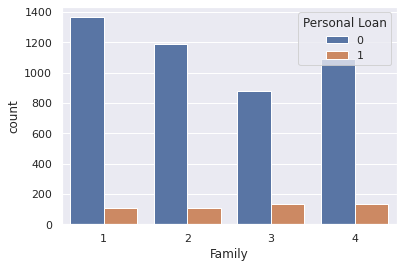

In [45]:
sns.countplot(x="Family",hue="Personal Loan",data=dataset)

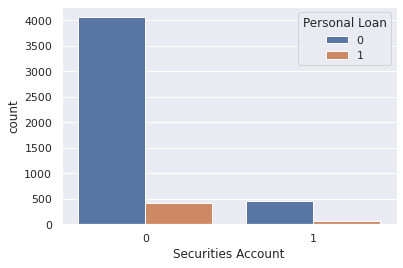

In [46]:
sns.countplot(x="Securities Account",hue="Personal Loan",data=dataset)

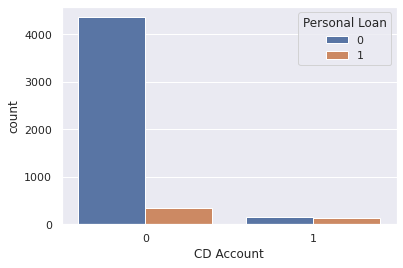

In [42]:
sns.countplot(x="CD Account",hue="Personal Loan",data=dataset)

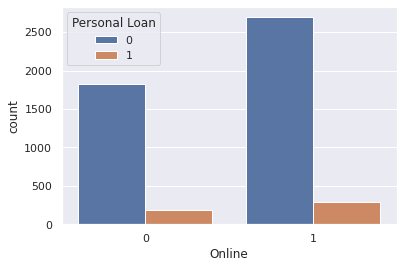

In [47]:
sns.countplot(x="Online",hue="Personal Loan",data=dataset)

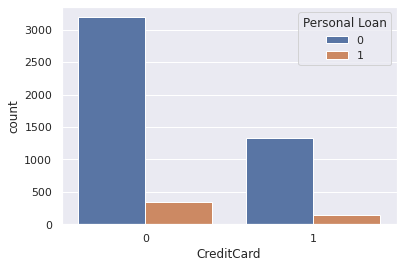

In [48]:
sns.countplot(x="CreditCard",hue="Personal Loan",data=dataset)

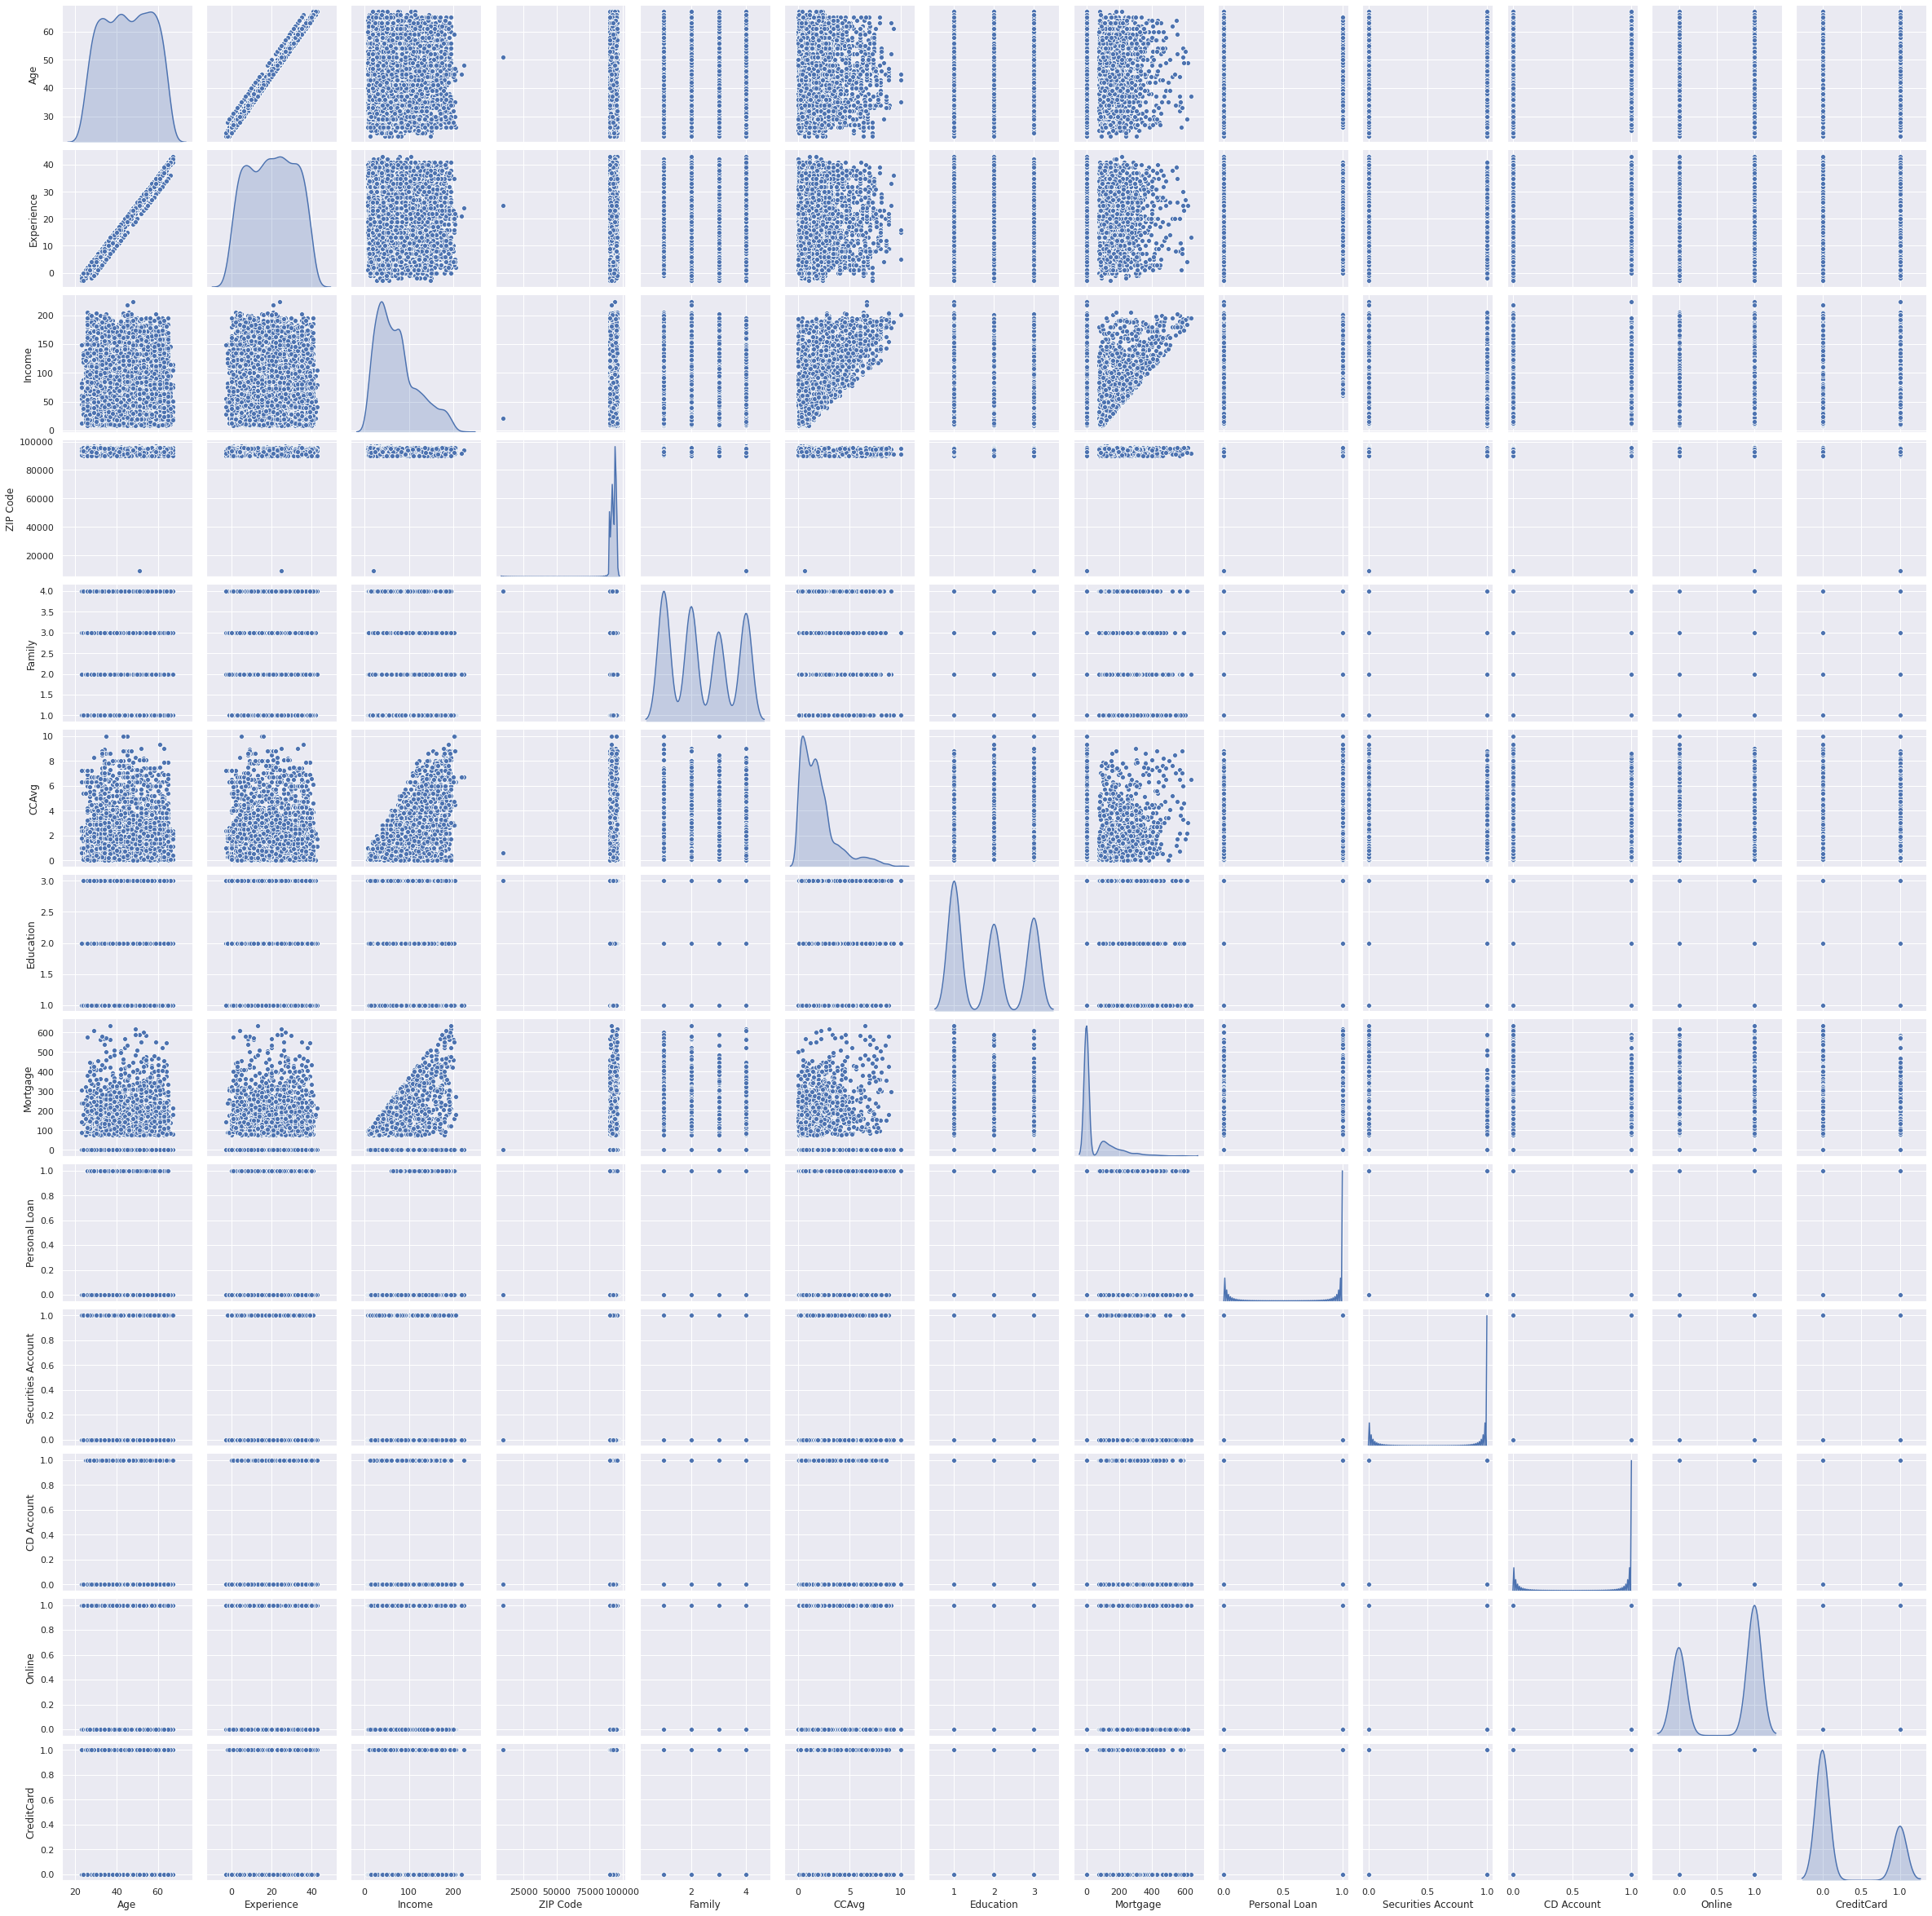

In [49]:
sns.pairplot(df,diag_kind='kde')

In [50]:
df.describe()

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,1.937913,56.498800
std,11.463166,11.467954,46.033729,2121.852197,1.747666,101.713802
min,23.000000,-3.000000,8.000000,9307.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,96651.000000,10.000000,635.000000





1.   We see -3 as experience,hence we'll inspect.
2.   Income values are skewed as we saw in univariate analysis.
3. Data of personal loan is overlaped wrt to most variables.
4. Using binning,inspect mortgage column 



In [55]:
bins = [0, 100, 200, 300, 400, 500, 600, 700]
group_names = [ 0, 1, 2, 3, 4, 5, 6]
df['Mortgage']= pd.cut(df['Mortgage'], bins, labels=group_names,include_lowest="true")

pd.value_counts(df['Mortgage'])




0    3744
1     758
2     297
3     128
4      48
5      21
6       4
Name: Mortgage, dtype: int64

In [58]:

df[df['Experience']<0].shape

(52, 14)

52 records have Experience less than zero, this is an error

In [60]:
df['Experience']=abs(df['Experience'])
df['Experience'].describe()


count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

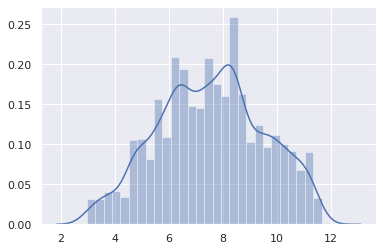

In [61]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(standardize=False)
pt.fit(df["Income"].values.reshape(-1,1))
a=pt.transform(df["Income"].values.reshape(-1,1))
sns.distplot(a)



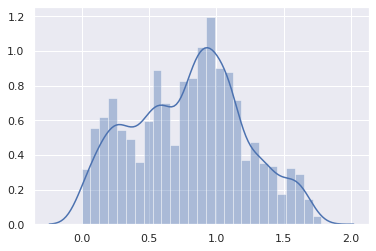

In [62]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(standardize=False)
pt.fit(df["CCAvg"].values.reshape(-1,1))
a=pt.transform(df["CCAvg"].values.reshape(-1,1))
sns.distplot(a)


In [84]:
X=df.loc[:,df.columns != 'Personal Loans']
y=df['Personal Loan']

**SPLITTING THE DATA USING STRATIFIED SAMPLING**

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train ,y_test=train_test_split(X,Y,test_size=0.3,train_size=0.7,stratify=Y,random_state=0)

#**LOGISTIC REGRESSION MODEL**


> Logistic regression is a classification algorithm, used when the value of the target variable is categorical in nature. Logistic regression is most commonly used when the data in question has binary output, so when it belongs to one class or another, or is either a 0 or 1.



In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [181]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)


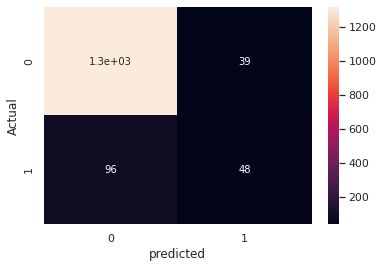

In [182]:
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['predicted'])
sns.heatmap(confusion_matrix,annot=True)

In [89]:
print('Accuracy = ',metrics.accuracy_score(y_test,y_pred))

Accuracy =  0.91


In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1317   39]
 [  96   48]]


In [142]:
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=48
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=1317
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=39
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=96

Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))

Accuracy of logistic regression classifier on test set: 91.00%
Misclassification Rate: It is often wrong: 9.00%
Sensitivity: When its actually yes how often it predicts yes: 33.33%
Specificity: When its actually no, how often does it predict no: 97.12%
Precision: When it predicts yes, how often is it correct: 55.17%


In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1356
           1       0.56      0.34      0.42       144

    accuracy                           0.91      1500
   macro avg       0.75      0.66      0.69      1500
weighted avg       0.90      0.91      0.90      1500



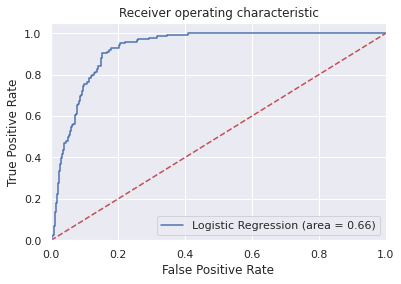

In [76]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#**KNN CLASSIFIER**

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [161]:
X_train1=X_train.drop(['ZIP Code','Income','Experience'],axis=1)
X_test1= X_test.drop(['ZIP Code','Income','Experience'],axis=1)

In [162]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'uniform' )
NNH.fit(X_train1, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [163]:
predicted_labels_KNN = NNH.predict(X_test1)

In [164]:
NNH.score(X_test1, y_test)

0.9406666666666667

In [165]:
print(metrics.confusion_matrix(y_test, predicted_labels_KNN))

[[1352    4]
 [  85   59]]


In [167]:
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=59
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=1352
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=4
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=85

Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))

Accuracy of logistic regression classifier on test set: 94.07%
Misclassification Rate: It is often wrong: 5.93%
Sensitivity: When its actually yes how often it predicts yes: 40.97%
Specificity: When its actually no, how often does it predict no: 99.71%
Precision: When it predicts yes, how often is it correct: 93.65%


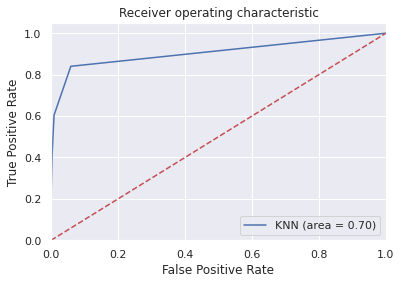

In [168]:
KNN_roc_auc = roc_auc_score(y_test, NNH.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, NNH.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

#**GAUSSIAN NAIVE BAYES**

In [121]:
from sklearn.naive_bayes import GaussianNB

In [175]:
GNB1 = GaussianNB()
GNB1.fit(X_train, y_train)
predicted_labels_GNB = GNB1.predict(X_test)

In [176]:
GNB1.score(X_test, y_test)
print(metrics.confusion_matrix(y_test, predicted_labels_GNB))

[[1356    0]
 [   0  144]]


In [144]:
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=144
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=1356
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=0
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=0

Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))

Accuracy of logistic regression classifier on test set: 100.00%
Misclassification Rate: It is often wrong: 0.00%
Sensitivity: When its actually yes how often it predicts yes: 100.00%
Specificity: When its actually no, how often does it predict no: 100.00%
Precision: When it predicts yes, how often is it correct: 100.00%


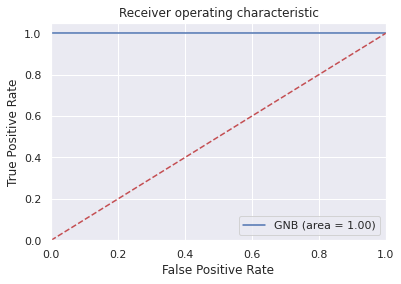

In [124]:
GNB_roc_auc = roc_auc_score(y_test, GNB1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, GNB1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GNB (area = %0.2f)' % GNB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [ ]:
#Chossing the best of all 3 models and below are there results:

#Model	  Results									                                                      Matrix
#Logistic Accuracy of logistic regression classifier on test set:          91.00%	    [[1317   39]                                                                                        
#	      Misclassification Rate:It is often wrong:                           9.00%		  [  96   48]]
#	      Sensitivity: When its actually yes how often it predicts yes:      33.33%
#	      Specificity: When its actually no, how often does it predict no:   97.12%
#	      Precision: When it predicts yes, how often is it correct:          55.17%
#	

#KNN	  Accuracy of logistic regression classifier on test set:            94.07%	    [[1352    4] 
#	      Misclassification Rate: It is often wrong:                          5.93%		  [  85   59]]
#	      Sensitivity: When its actually yes how often it predicts yes:      40.97%
#	      Specificity: When its actually no, how often does it predict no:   99.71%
#	      Precision: When it predicts yes, how often is it correct:          93.65%
#	
#GNB	  Accuracy of logistic regression classifier on test set:           100.00%		 [[1356   0]
#	      Misclassification Rate: It is often wrong:                             0%		  [  0  144]]
#	      Sensitivity: When its actually yes how often it predicts yes:     100.00%
#	      Specificity: When its actually no, how often does it predict no:  100.00%
#	      Precision: When it predicts yes, how often is it correct:         100.00%
#

In [ ]:
#KNN model performs the best, evident from above results.
#The yes prediction is on lower side as data is not balanced. Data was not altered as figure represented the 
#true picture of market i.e. person who took loan are on lower side.
#If we apply the model and change our approach and target only those predicted as yes first, it is 93.65% (Precision)
#chance they will take loan. Hence our chances that a person takes personal loan increases.
#Though our Sensitivity is around 40.97% still we end up offering more loans at end of program